In [28]:
# Module importieren
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.linear_model import LinearRegression, LogisticRegression

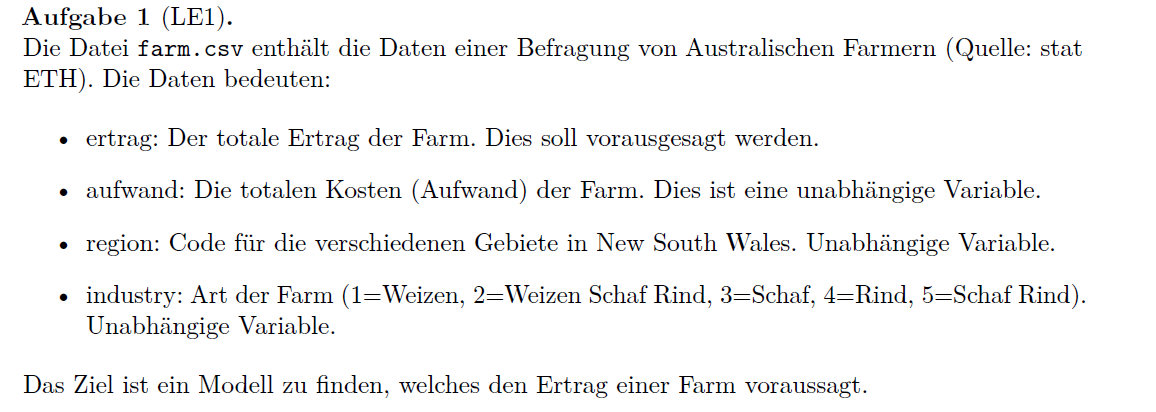

In [29]:
# farm.csv Datei einlesen in Pandas DataFarme
df_farm = pd.read_csv("farm.csv", index_col="Unnamed: 0")

# DataFarme ausgeben
df_farm

,region,industry,aufwand,ertrag
1,111,3,115096,147652
2,111,5,75443,82920
3,111,2,378857,442726
4,111,1,433590,649628
5,111,2,347417,407836
...,...,...,...,...
447,132,4,16290,29651
448,132,4,46699,92614
449,132,4,266182,108412
450,132,4,79724,75340


In [30]:
df_farm.dtypes

region      int64
industry    int64
aufwand     int64
ertrag      int64
dtype: object

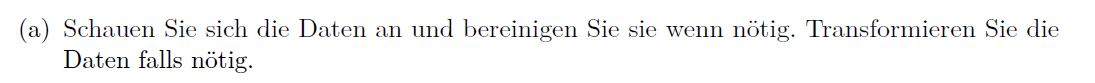

In [31]:
# Daten Transformieren



In [32]:
# DataFarme ausgeben
df_farm

,region,industry,aufwand,ertrag
1,111,3,115096,147652
2,111,5,75443,82920
3,111,2,378857,442726
4,111,1,433590,649628
5,111,2,347417,407836
...,...,...,...,...
447,132,4,16290,29651
448,132,4,46699,92614
449,132,4,266182,108412
450,132,4,79724,75340


In [33]:
# X Features und y Target definieren
X = df_farm[["region", "industry", "aufwand"]]
y = df_farm[["ertrag"]]

# Ausgeben von X und y
display(X, y)

,region,industry,aufwand
1,111,3,115096
2,111,5,75443
3,111,2,378857
4,111,1,433590
5,111,2,347417
...,...,...,...
447,132,4,16290
448,132,4,46699
449,132,4,266182
450,132,4,79724


,ertrag
1,147652
2,82920
3,442726
4,649628
5,407836
...,...
447,29651
448,92614
449,108412
450,75340


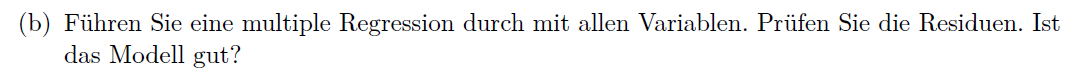

In [34]:
# Model1 erstellen (multiple Regression)
model1 = LinearRegression().fit(X, y)

In [35]:
# Koeffizienten von Model1 ausgeben
display(model1.coef_, model1.intercept_) 

array([[-2.14150055e+02, -4.94719539e+03,  1.00986059e+00]])

array([83412.1464812])

In [36]:
X.shape

(451, 3)

In [37]:
# Residuenanalyse 
y_predict = model1.predict(X) # array

residuen = y_predict - y.values

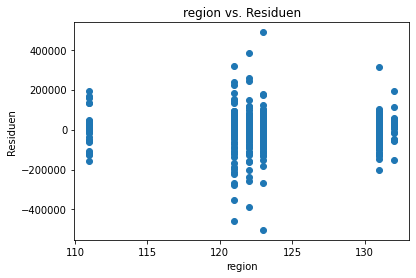

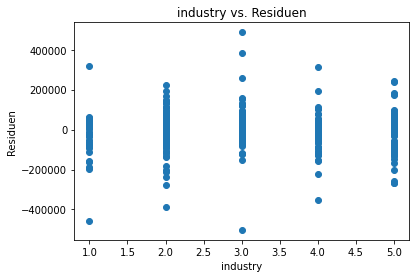

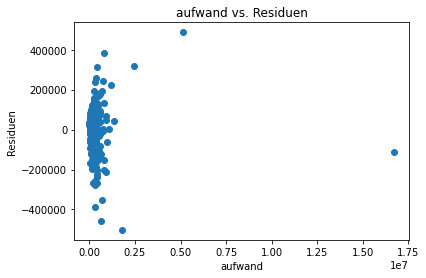

In [38]:
# Scatterplots (Erwartungswert )
for i in range(X.shape[1]):
    plt.scatter(x = df_farm.iloc[: , i].values.reshape(-1,1), y = residuen)
    plt.title(str(df_farm.columns[i]) + " vs. Residuen")
    plt.xlabel(str(df_farm.columns[i]))
    plt.ylabel("Residuen")
    plt.show()

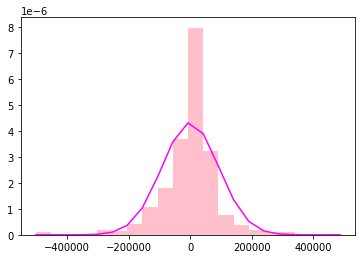

In [39]:
# Histogramm mit Verteilung
n, bins, patches = plt.hist(residuen, bins = 20, color = "pink", density = True)

mue = np.mean(residuen)
sigma = np.std(residuen)
normd = norm.pdf(bins, mue, sigma)

plt.plot(bins, normd, color = "fuchsia")

plt.show()

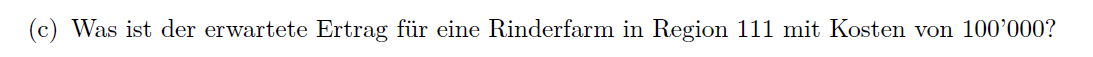

In [43]:
# Region = 111
# Industry = 3
# Aufwand = 100 000

result = model1.coef_[0][0] * 111 + model1.coef_[0][1] * 3 + model1.coef_[0][2] * 100000 + model1.intercept_
result[0]

145785.9630307809